In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [2]:
basee = 'archive'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/'+label+'.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC
def open_visc(label):
    base = basee 
    IC = xr.open_dataset(base + '/visc-'+label+'.nc')
    return IC
def open_mom(label):
    base = basee 
    IC = xr.open_dataset(base + '/mom-'+label+'.nc')
    return IC

def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('z/ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    #IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    #plt.colorbar(cax, ax = ax, label = varname)
    plt.colorbar(cax, ax = ax, label = 'u (m/s)')
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


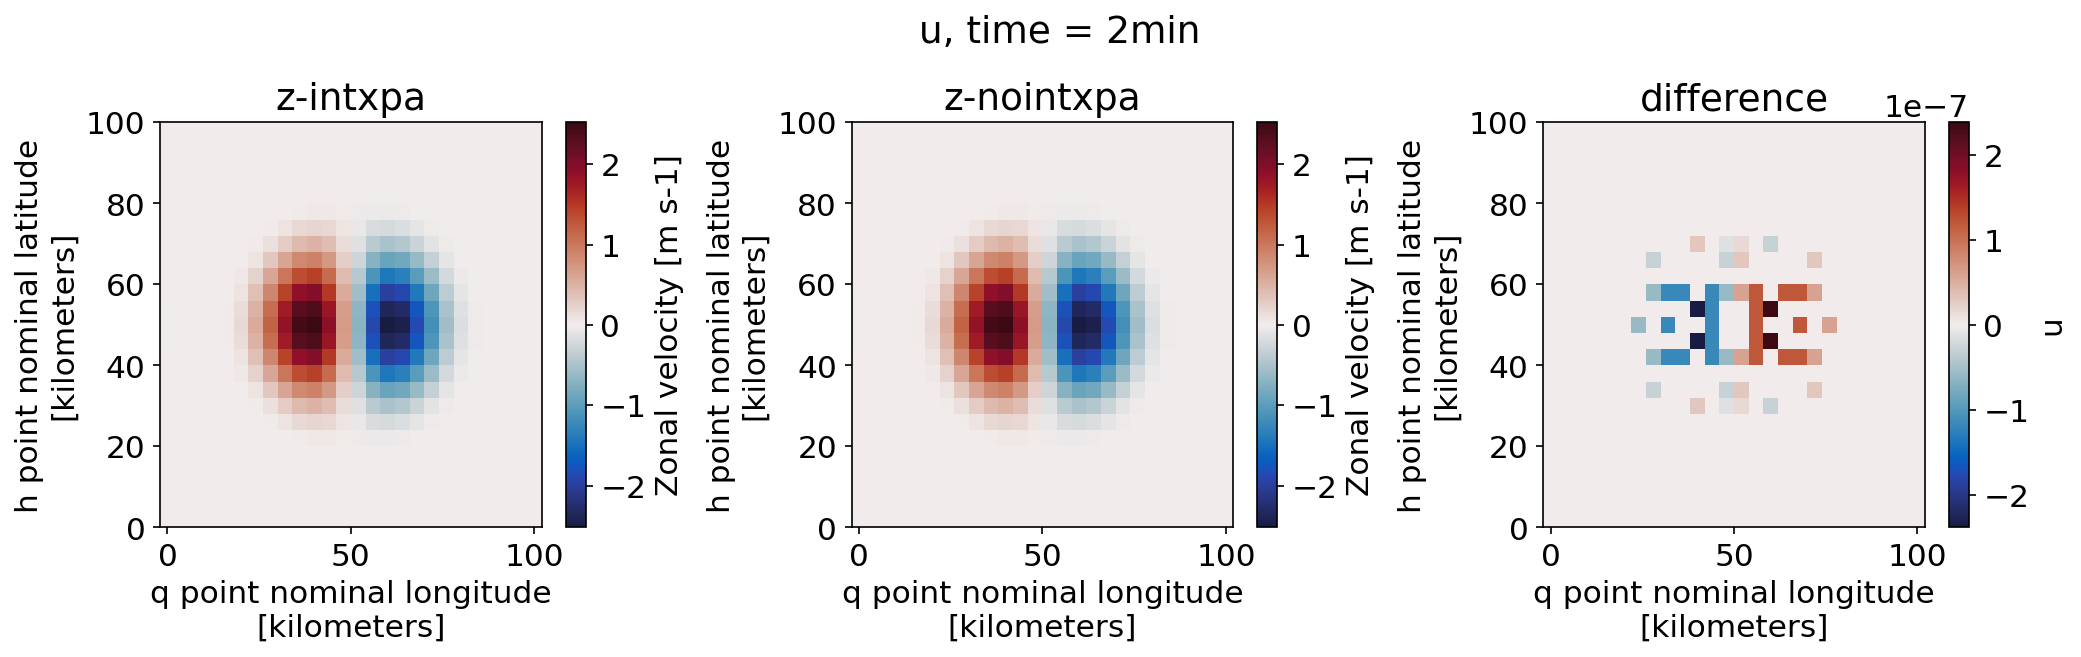

In [3]:
plt.rcParams.update({'font.size': 15})


label = 'z-intxpa'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4),dpi = 150)
prog1 = open_files(label)
#IC = open_IC(label)
z = 0
time = 0#24*5-1
prog1.u.isel(zl = 0, Time = time).plot(ax = axes[0], cmap = cm.cm.balance)
axes[0].set_title(label)

label = 'z-nointxpa'
prog2 = open_files(label)
prog2.u.isel(zl = 0, Time = time).plot(ax = axes[1], cmap = cm.cm.balance)
axes[1].set_title(label)

#difference
(prog1.u - prog2.u).isel(zl = 0, Time = time).plot(ax = axes[2], cmap = cm.cm.balance)
axes[2].set_title('difference')

#axes[0].set_title('u, t = 15m, \n reset')
#axes[1].set_title('u, t = 15m, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45, top = 0.8)
fig.suptitle('u, time = '+str((time+1)*2)+'min')
plt.show()


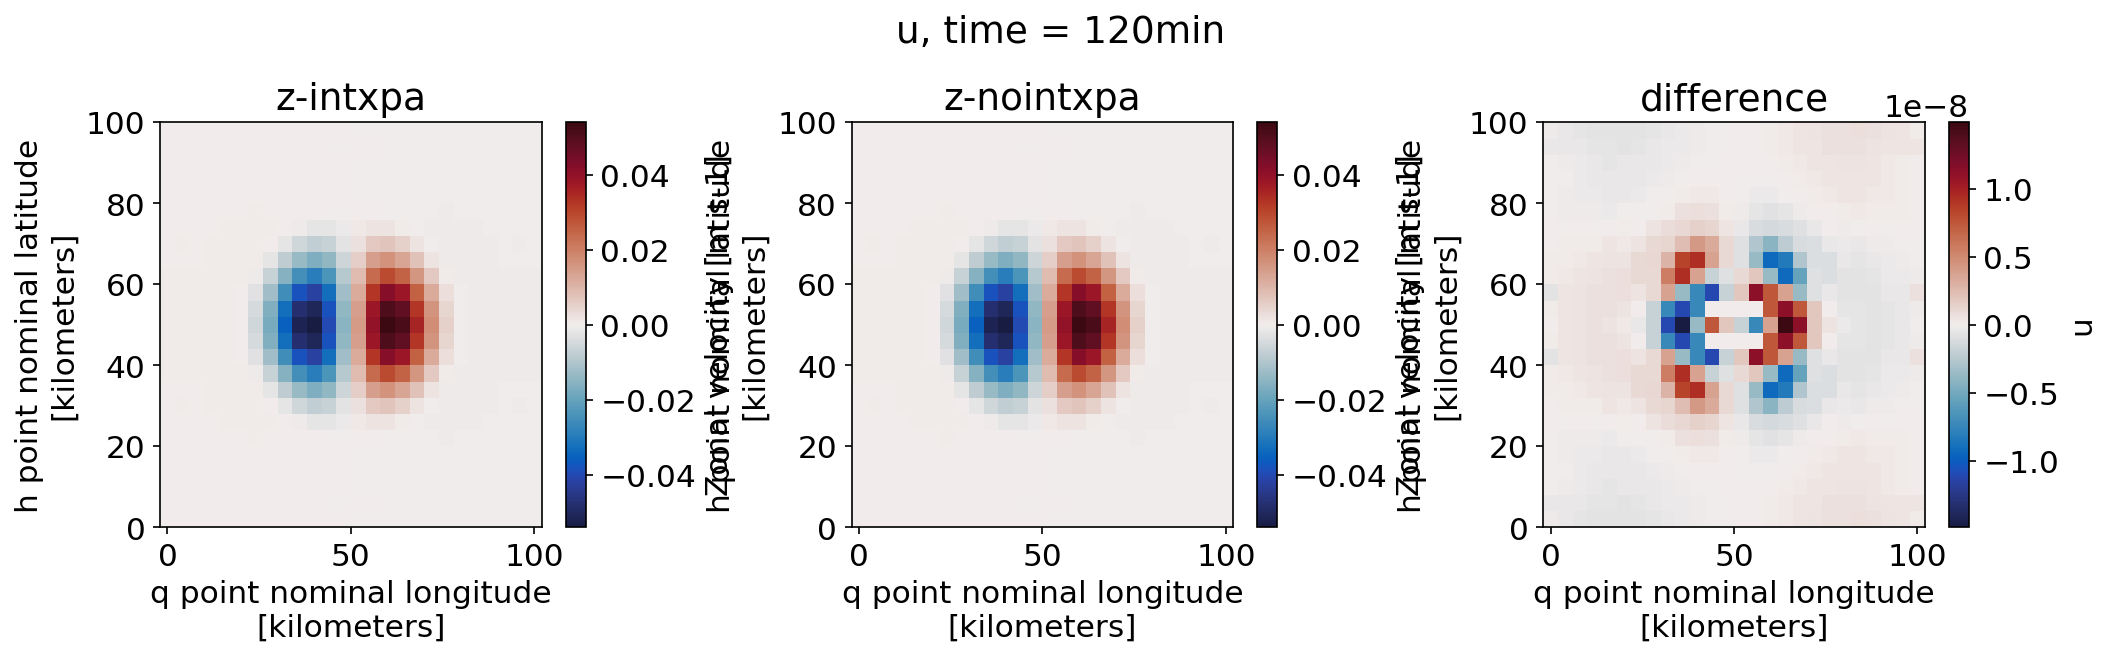

In [4]:
plt.rcParams.update({'font.size': 15})


label = 'z-intxpa'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4),dpi = 150)
prog1 = open_files(label)
#IC = open_IC(label)
z = 0
time = 59#24*5-1
prog1.u.isel(zl = 0, Time = time).plot(ax = axes[0], cmap = cm.cm.balance)
axes[0].set_title(label)

label = 'z-nointxpa'
prog2 = open_files(label)
prog2.u.isel(zl = 0, Time = time).plot(ax = axes[1], cmap = cm.cm.balance)
axes[1].set_title(label)

#difference
(prog1.u - prog2.u).isel(zl = 0, Time = time).plot(ax = axes[2], cmap = cm.cm.balance)
axes[2].set_title('difference')

#axes[0].set_title('u, t = 15m, \n reset')
#axes[1].set_title('u, t = 15m, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45, top = 0.8)
fig.suptitle('u, time = '+str((time+1)*2)+'min')
plt.show()


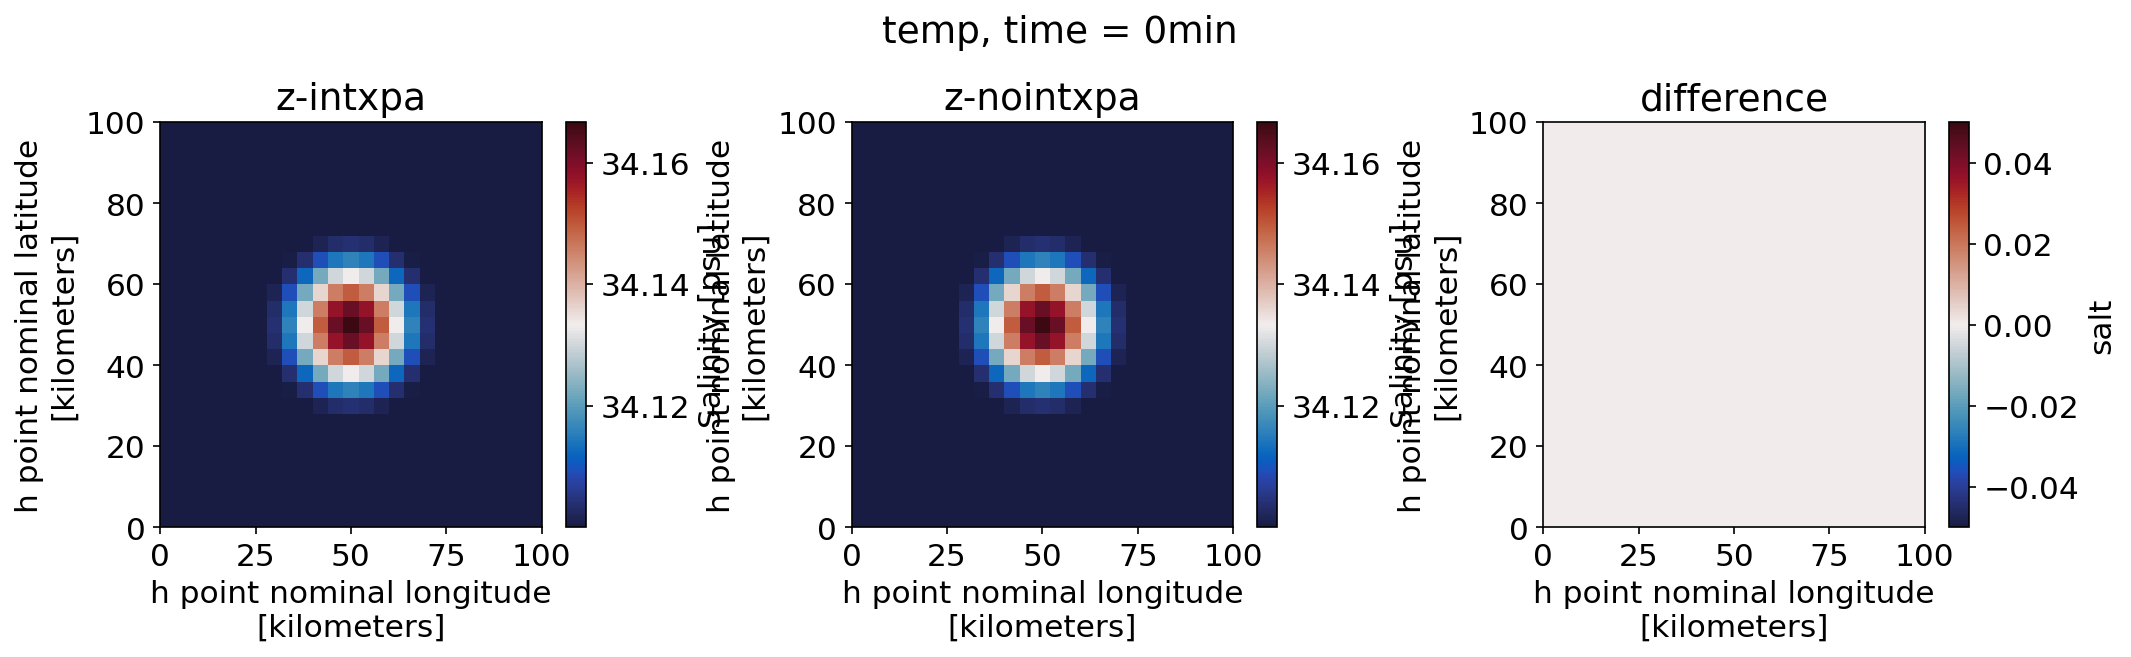

In [7]:
plt.rcParams.update({'font.size': 15})


label = 'z-intxpa'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4),dpi = 150)
prog1 = open_files(label)
#IC = open_IC(label)
z = 0
time = -1#24*5-1
prog1.salt.isel(zl = 0, Time = time).plot(ax = axes[0], cmap = cm.cm.balance)
axes[0].set_title(label)

label = 'z-nointxpa'
prog2 = open_files(label)
prog2.salt.isel(zl = 0, Time = time).plot(ax = axes[1], cmap = cm.cm.balance)
axes[1].set_title(label)

#difference
(prog1.salt - prog2.salt).isel(zl = 0, Time = time).plot(ax = axes[2], cmap = cm.cm.balance)
axes[2].set_title('difference')

#axes[0].set_title('u, t = 15m, \n reset')
#axes[1].set_title('u, t = 15m, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45, top = 0.8)
fig.suptitle('temp, time = '+str((time+1)*2)+'min')
plt.show()


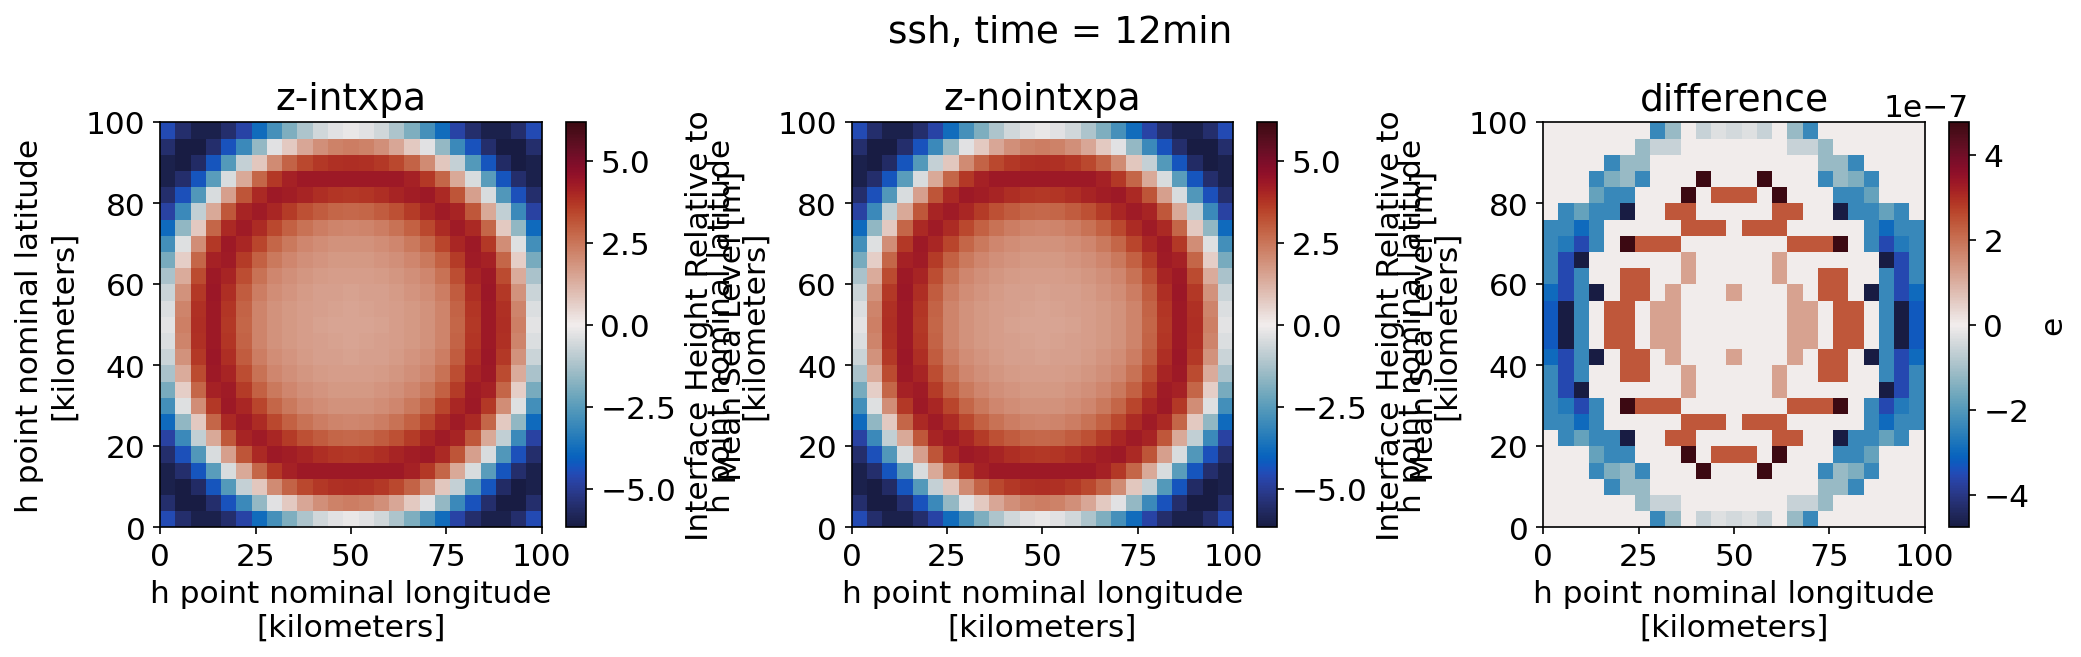

In [16]:
plt.rcParams.update({'font.size': 15})


label = 'z-intxpa'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4),dpi = 150)
prog1 = open_files(label)
#IC = open_IC(label)
z = 0
time = 5#24*5-1
prog1.e.isel(zi = 0, Time = time).plot(ax = axes[0], cmap = cm.cm.balance)
axes[0].set_title(label)

label = 'z-nointxpa'
prog2 = open_files(label)
prog2.e.isel(zi = 0, Time = time).plot(ax = axes[1], cmap = cm.cm.balance)
axes[1].set_title(label)

#difference
(prog1.e - prog2.e).isel(zi = 0, Time = time).plot(ax = axes[2], cmap = cm.cm.balance)
axes[2].set_title('difference')

#axes[0].set_title('u, t = 15m, \n reset')
#axes[1].set_title('u, t = 15m, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45, top = 0.8)
fig.suptitle('ssh, time = '+str((time+1)*2)+'min')
plt.show()


Since initilised with depressed (or raised?) surface, salinity linear in depth, there is a salinity gradient